In [10]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import talib
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


def positivecounter(df):
    counter = []
    index = 0
    for i in df['pos_string']:
        if i == 1:
            index = index + 1
            counter.append(index)
        else:
            index = 0
            counter.append(index)
    df['count_pos_string'] = counter  

Paper: https://github.com/loreIT/Machine-learnin-for-finance--university-project/blob/main/AI_for_financial_market_report.pdf

# Data 

In [27]:
d = pd.read_csv("Binance_ETHUSDT_d.csv", skiprows = 1, parse_dates=['Date'])[::-1].reset_index(drop = True)

d['AdjClose'] = d.Close
d["SPD_OPEN/CLOSE"] = d["Close"] - d["Open"]
d["SPD_HIGH/LOW"] = d["High"] - d["Low"]
d["Adj_Close_Returns"] = d["AdjClose"].pct_change()*100
d["Close_Returns"] = d["Close"].pct_change()*100
d['Log_Returns'] = np.log(d['AdjClose'].astype('float64')/d['AdjClose'].astype('float64').shift(1))

d = d.set_index("Date")

d['avg7'] = d["AdjClose"].rolling(window =7).mean()
d["avg10"] = d["AdjClose"].rolling(window =10).mean()
d["avg50"] = d["AdjClose"].rolling(window =50).mean()
d['avg100'] = d["AdjClose"].rolling(window =100).mean()
d["avg200"] = d["AdjClose"].rolling(window =200).mean()
d['avg253'] = d["AdjClose"].rolling(window =253).mean()

d = d.dropna()
d.rename({'Volume ETH': 'Volume'}, axis=1, inplace=True)

In [28]:
d["pos_string"] = (d["Adj_Close_Returns"] > 0).astype(int)

d = d.fillna(0)

d = d[['AdjClose','Open','High','Low','Close','Volume','avg7','avg10','avg50','avg100','avg200','avg253','SPD_OPEN/CLOSE','SPD_HIGH/LOW', "Adj_Close_Returns",'Close_Returns','Log_Returns','pos_string']]

d['direction'] = np.sign(d['Adj_Close_Returns']).astype(int)

positivecounter(d)

d

,AdjClose,Open,High,Low,Close,Volume,avg7,avg10,avg50,avg100,avg200,avg253,SPD_OPEN/CLOSE,SPD_HIGH/LOW,Adj_Close_Returns,Close_Returns,Log_Returns,pos_string,direction,count_pos_string
Date,,,,,,,,,,,,,,,,,,,,
2018-04-26,661.51,617.73,666.19,600.00,661.51,155754.00815,638.437143,606.585,528.0312,726.4917,635.63990,566.451225,43.78,66.19,7.040453,7.040453,0.068037,1,1,1
2018-04-27,643.46,661.51,686.82,635.73,643.46,134803.48389,642.204286,620.675,526.9912,722.9263,637.37125,567.800870,-18.05,51.09,-2.728606,-2.728606,-0.027665,0,-1,0
2018-04-28,682.86,643.41,694.90,638.76,682.86,113128.36337,653.345714,636.352,526.1742,719.8149,639.29235,569.338024,39.45,56.14,6.123147,6.123147,0.059430,1,1,1
2018-04-29,690.85,683.50,700.49,665.28,690.85,110020.23869,663.335714,648.623,526.3796,716.3984,641.22655,570.918814,7.35,35.21,1.170079,1.170079,0.011633,1,1,2
2018-04-30,670.78,690.85,695.30,662.20,670.78,112494.91720,667.005714,653.992,525.3782,711.5787,643.06050,572.387905,-20.07,33.10,-2.905117,-2.905117,-0.029482,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,1211.55,1228.12,1233.73,1200.58,1211.55,262437.63980,1218.580000,1209.788,1229.0294,1307.4720,1388.49895,1575.624150,-16.57,33.15,-1.348413,-1.348413,-0.013576,0,-1,0
2022-12-28,1190.15,1211.55,1215.78,1181.06,1190.15,367828.89140,1215.204286,1210.497,1226.1370,1305.6137,1386.78525,1568.068340,-21.40,34.72,-1.766332,-1.766332,-0.017821,0,-1,0
2022-12-29,1200.49,1190.15,1206.57,1186.77,1200.49,249130.48690,1212.744286,1213.764,1228.0922,1304.3893,1385.61350,1560.655099,10.34,19.80,0.868798,0.868798,0.008650,1,1,1


In [29]:
train_pct_index = int(0.7*len(d))
train, test = d[:train_pct_index],d[train_pct_index:]

In [30]:
train['Log_Returns'] = np.log(train['AdjClose'] / train['AdjClose'].shift(1))

/var/folders/3n/qb9qrmdn45q_rjlp5x6g7k5c0000gn/T/ipykernel_65683/3923396444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Log_Returns'] = np.log(train['AdjClose'] / train['AdjClose'].shift(1))


## MACD

In [40]:
macd, macdsignal, macdhist = talib.MACD(d.Close, fastperiod=12, slowperiod=26, signalperiod=9)
d["macd"] = macd
d["signal"] = macdsignal
d["hist"] = macdhist

mean_macd = d["macd"].mean()
mean_hist = d["hist"].mean()
mean_signal = d["signal"].mean()

d["macd"]= d["macd"].fillna(mean_macd)
d["hist"]= d["hist"].fillna(mean_hist)
d["signal"]= d["signal"].fillna(mean_signal)

MACD_DAILY = []
MACD_9DAY = []

for i in range(len(macd)):
    if macd[i-1] <0 and  macd[i] > 0:
        MACD_DAILY.append(1)
    elif macd[i-1] > 0 and macd[i] < 0:
        MACD_DAILY.append(-1)
    else:
        MACD_DAILY.append(0)
        
d["MACD_1DAY_strategy"] = MACD_DAILY

for i in range(len(macdsignal)):
    if macdsignal[i-1] <0 and  macdsignal[i] > 0:
        MACD_9DAY.append(1)
    elif macdsignal[i-1] > 0 and macdsignal[i] < 0:
        MACD_9DAY.append(-1)
    else:
        MACD_9DAY.append(0)
        
d["MACD_9DAY_strategy"] = MACD_9DAY

MACD_CONVERGENCE = []

for i in range(len(MACD_DAILY)):
    if MACD_DAILY[i]== -1 and MACD_9DAY[i] == -1:
        MACD_CONVERGENCE.append(-1)
    elif MACD_DAILY[i]== 1 and MACD_9DAY[i] == 1:
        MACD_CONVERGENCE.append(1)
    else:
        MACD_CONVERGENCE.append(0)


d["MACD_CONVERGENCE_strategy"] = MACD_CONVERGENCE

## RSI

In [41]:
rsi = talib.RSI(d.Close, timeperiod=14)
d["RSI"] = rsi

mean = d["RSI"].mean()

d["RSI"]= d["RSI"].fillna(mean)

RSI = []

for i in d["RSI"]:
    if i > 70:
        RSI.append(-1)
    elif i> 30 and i< 70:
        RSI.append(0)
    elif i < 30:
        RSI.append(1)
  

d["RSI_strategy"] = RSI

## OBV - On Balance Volume


In [42]:
d["OBV"] = talib.OBV(d.Close, d.Volume)
d['OBV_EMA'] = d['OBV'].ewm(com=200).mean()

#if OBV > OBV EMA BUY (1) else sell (-1), creare un intervallo medio che rappresenti lo 0

obv = d["OBV"]
obv_ema = d["OBV_EMA"]

OBV_strategy= []

for i in range(len(obv)):
    if obv[i] > obv_ema[i]:
        strategy = 1
    else:
        strategy = -1
        
    OBV_strategy.append(strategy)

d["OBV_strategy"] = OBV_strategy

## TSF - Time Series Forecast

In [39]:
d["TSF"] = talib.TSF(d.Close, timeperiod=14)

mean = d["TSF"].mean()

d["TSF"]= d["TSF"].fillna(mean)

tsf = d["TSF"]
TSF= []


for i in range(len(tsf)):
    if tsf[i] >  (d.Close[i]*1.05):
        TSF.append(1)
    elif tsf[i] <  (d.Close[i]*1.05) and tsf[i] >= (d.Close[i]*0.95):
        TSF.append(0)
    elif tsf[i] <  (d.Close[i]*0.95):
        TSF.append(-1)
   
d["TSF_strategy"] = TSF

## WILLR - William's R

In [43]:
d["WILLR"] = talib.WILLR(d.High, d.Low, d.Close, timeperiod=14)

mean = d["WILLR"].mean()

d["WILLR"]= d["WILLR"].fillna(mean)

WILLR = []

for i in d["WILLR"]:
    if i >= -20:
        WILLR.append(-1)
    elif i> -80 and i< -20:
        WILLR.append(0)
    elif i <= -80:
        WILLR.append(1)

d["WILLR_strategy"] = WILLR


## STOCH

In [44]:
stoch_K, stoch_D = talib.STOCH(d.High, d.Low, d.Close, fastk_period=14, slowk_period=3,  slowd_period=3)
d["STOCH_K"] = stoch_K
d["STOCH_D"] = stoch_D

IBM_stoch_k = []
IBM_stoch_d = []

for x in stoch_K:
    if x >= 80:
        IBM_stoch_k.append(-1)
    elif x <= 20:
        IBM_stoch_k.append(1)
    else:
        IBM_stoch_k.append(0)

        
d["STOCH_K_strategy"] = IBM_stoch_k



for x in stoch_D:
    if x >= 80:
        IBM_stoch_d.append(-1)
    elif x <= 20:
        IBM_stoch_d.append(1)
    else:
        IBM_stoch_d.append(0)

        
d["STOCH_D_strategy"] = IBM_stoch_d

## EMA

In [46]:
d["EMA"] = d.AdjClose.ewm(span = 3, min_periods =0, adjust= True, ignore_na = False).mean()

## TEMA

In [47]:
d["TEMA"] = (3* d.EMA - 3 * d.EMA * d.EMA) + (d.EMA * d.EMA* d.EMA)

## BOLLINGER WINDOW 21G STD 2

In [49]:
upperband, middleband, lowerband = talib.BBANDS(d.Close, timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)
d["upperband"] = upperband
d["middleband"] = middleband
d["lowerband"] = lowerband

## MOM

In [50]:
d["MOM"] = d.AdjClose - 1

## STOCH D

In [52]:
def stok(df, n):
    df["stok"] = ((df["Close"] - df["Low"].rolling(window = n, center = False).mean()) /
                  (df["High"].rolling(window = n, center = False).max() -
                  df["Low"].rolling(window = n, center = False).min())) *100
    df["stod"] = df["stok"].rolling(window = 3, center = False).mean()
stok(d, 4)

d = d.fillna(0)

## ROC - Rate of Change

In [53]:
d["ROC"] = talib.ROC(d.Close, timeperiod = 12)

## CCI - Commodity Channel Index

In [54]:
d["CCI"] = talib.CCI(d.High, d.Low, d.Close, timeperiod=20)

In [55]:
d.to_csv('clean_data.csv')

In [58]:
df = d[[
    "Close", "MACD_1DAY_strategy", "MACD_9DAY_strategy", "MACD_CONVERGENCE_strategy",
    "RSI_strategy", "TSF_strategy", "OBV_strategy",
]]

In [59]:
def buy_sell(signal, col1, col2, col3, col4, col5):
  sigPriceBuy = []
  sigPriceSell = []
  #Loop through the length of the data set
  for i in range(0,len(signal)):
 

    if signal[col1][i] == 1:
      
            sigPriceBuy.append(signal['Close'][i])
            sigPriceSell.append(np.nan)

    
    elif signal[col2][i] == 1:    
         
            sigPriceSell.append(np.nan)
            sigPriceBuy.append(signal['Close'][i])
        
        
    elif signal[col3][i] == 1:   
        
            sigPriceSell.append(np.nan)
            sigPriceBuy.append(signal['Close'][i])
        
    
    elif signal[col4][i] == 1:   

            sigPriceSell.append(np.nan)
            sigPriceBuy.append(signal['Close'][i])
        
        
    elif signal[col5][i] == 1:    
            sigPriceSell.append(np.nan)
            sigPriceBuy.append(signal['Close'][i])
        

    elif signal[col1][i] == -1:   
            sigPriceSell.append(signal['Close'][i])
            sigPriceBuy.append(np.nan)
    
    
    elif signal[col2][i] == -1:    
            sigPriceSell.append(signal['Close'][i])
            sigPriceBuy.append(np.nan)
        
    
    
    elif signal[col3][i] == -1:    
            sigPriceSell.append(signal['Close'][i])
            sigPriceBuy.append(np.nan)
        
    
    elif signal[col4][i] == -1:    
            sigPriceSell.append(signal['Close'][i])
            sigPriceBuy.append(np.nan)
        
    
    
    elif signal[col5][i] == -1:
            sigPriceSell.append(signal['Close'][i])
            sigPriceBuy.append(np.nan)
        
        
      
    else: 
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

All period profit:  30545.880000000005


/var/folders/3n/qb9qrmdn45q_rjlp5x6g7k5c0000gn/T/ipykernel_65683/4110814435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Buy_Signal_Price'] = b
/var/folders/3n/qb9qrmdn45q_rjlp5x6g7k5c0000gn/T/ipykernel_65683/4110814435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sell_Signal_Price'] = s


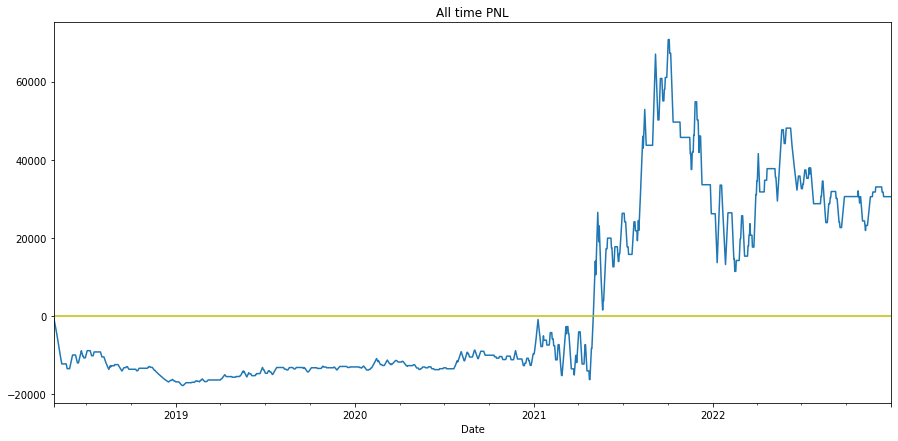

In [167]:
#Create buy and sell columns
b, s = buy_sell(df, 'MACD_1DAY_strategy','MACD_9DAY_strategy', "MACD_CONVERGENCE_strategy", "RSI_strategy", "TSF_strategy" )
df['Buy_Signal_Price'] = b
df['Sell_Signal_Price'] = s

print("All period profit: ", df["Sell_Signal_Price"].sum() - df["Buy_Signal_Price"].sum())
(df.Sell_Signal_Price.fillna(0) - df.Buy_Signal_Price.fillna(0)).cumsum().plot(figsize = (15, 7), title= "All time PNL")
plt.axhline(y=0, color='y', linestyle='-')

In [161]:
def analyze(start, end, df):
    temp = df.copy().loc[start:end]
    buytimes = df[df.Buy_Signal_Price.notna()].index
    selltimes = df[df.Sell_Signal_Price.notna()].index
    plt.figure(figsize=(20,5), layout = 'tight')
    temp['Close'].plot(title='Positions', grid=True)
    for b in buytimes:
        plt.axvline(x=b, color='g')
    for s in selltimes:
        plt.axvline(x=s, color='r')
    buys = temp["Buy_Signal_Price"]
    sells = temp["Sell_Signal_Price"]
    print("Profit: ",sells.sum() -  buys.sum(), " Buy trades: ", buys.count(), " Sell trades: ", sells.count())
    plt.figure(figsize=(20,5), layout = 'tight')
    (sells.fillna(0) - buys.fillna(0)).cumsum().plot( title='PNL', grid=True)
    plt.axhline(y=0, color='y', linestyle='-')


Profit:  -16819.940000000002  Buy trades:  95  Sell trades:  39


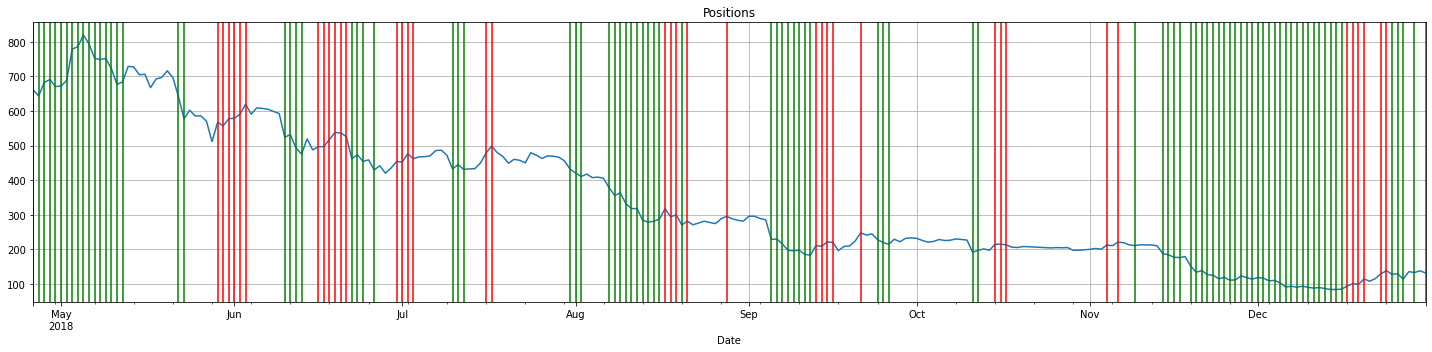

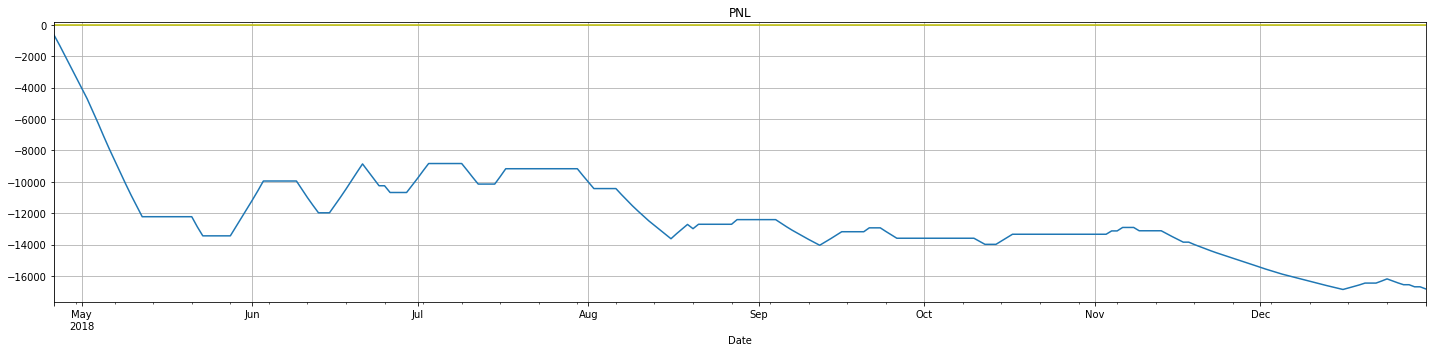

In [162]:
analyze('2018-01-01', '2018-12-31', df)

Profit:  3816.779999999999  Buy trades:  59  Sell trades:  78


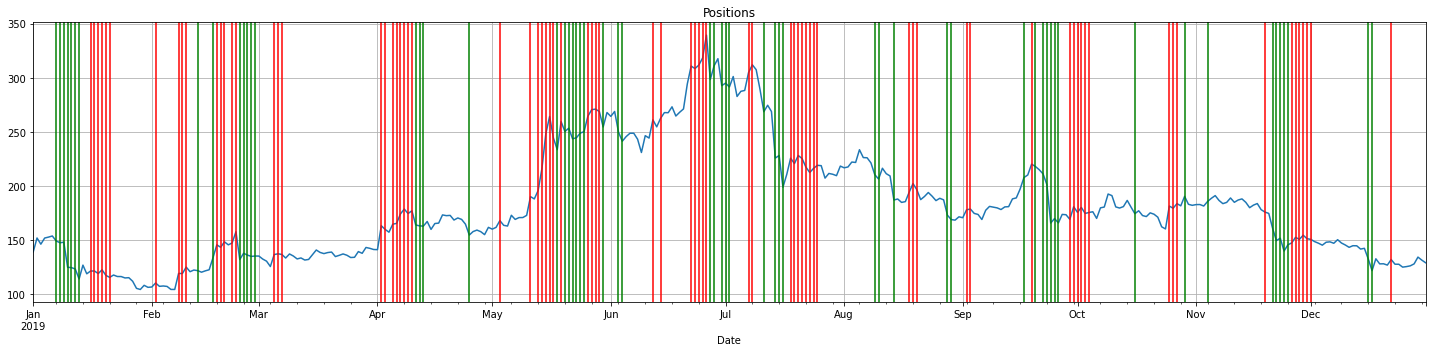

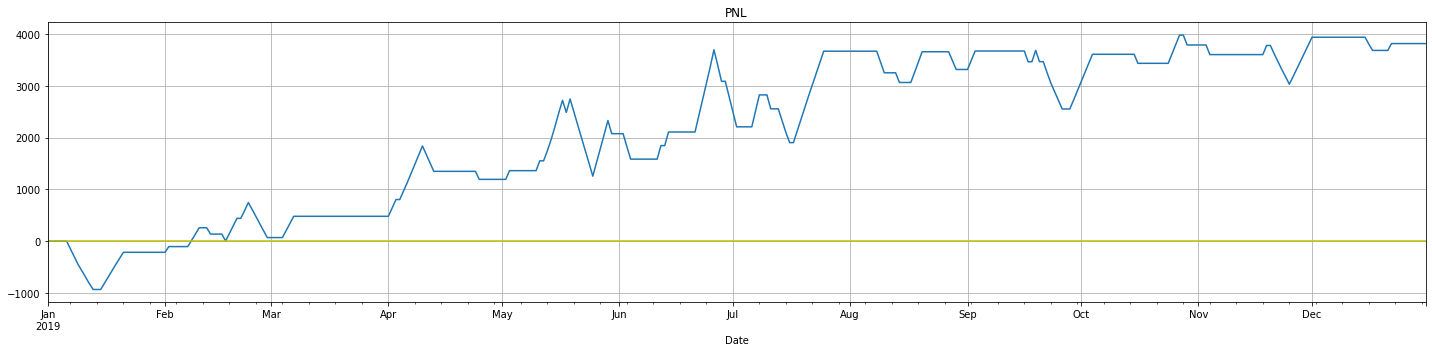

In [163]:
analyze('2019-01-01', '2019-12-31', df)

Profit:  3309.7599999999948  Buy trades:  81  Sell trades:  83


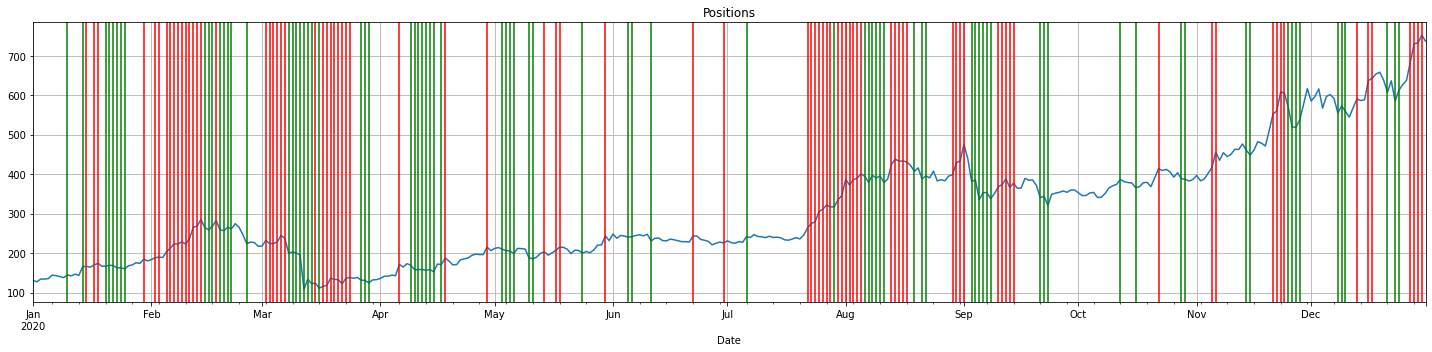

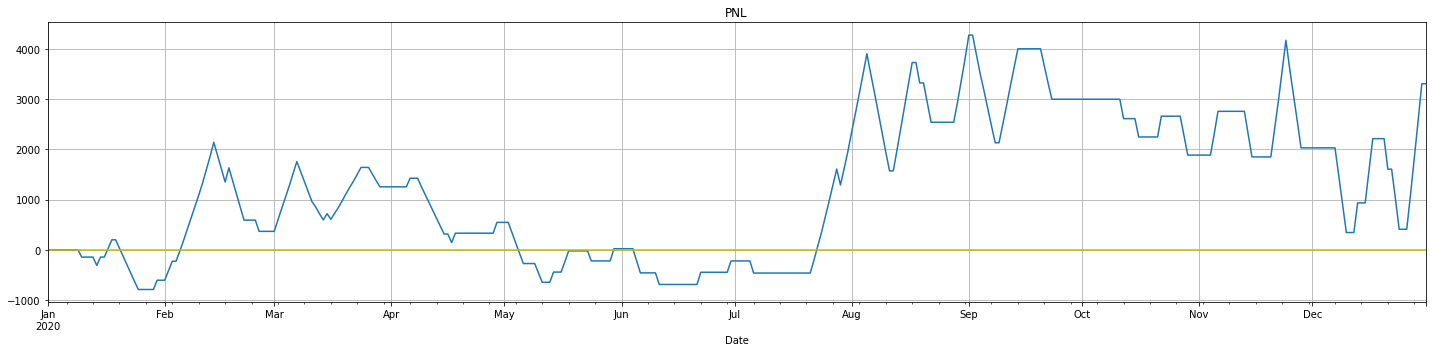

In [164]:
analyze('2020-01-01', '2020-12-31', df)

Profit:  35874.98999999999  Buy trades:  85  Sell trades:  98


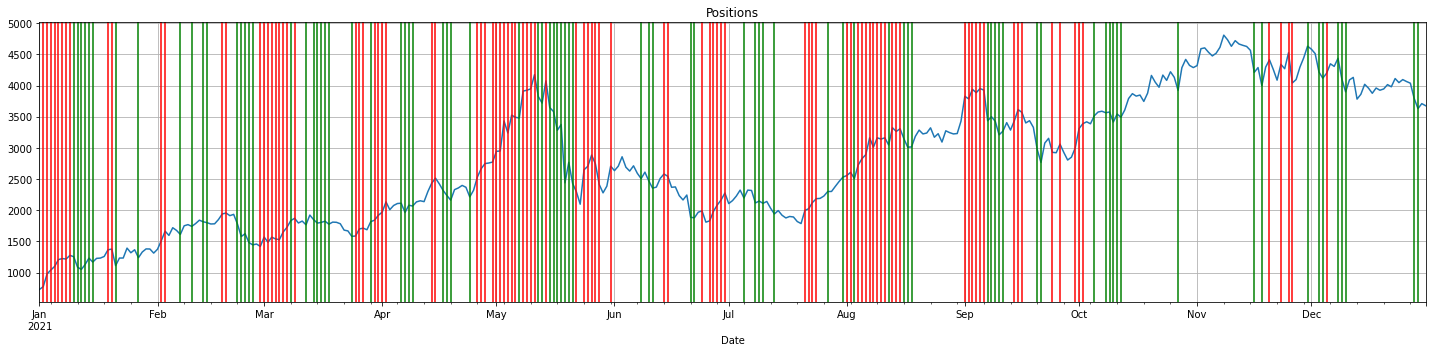

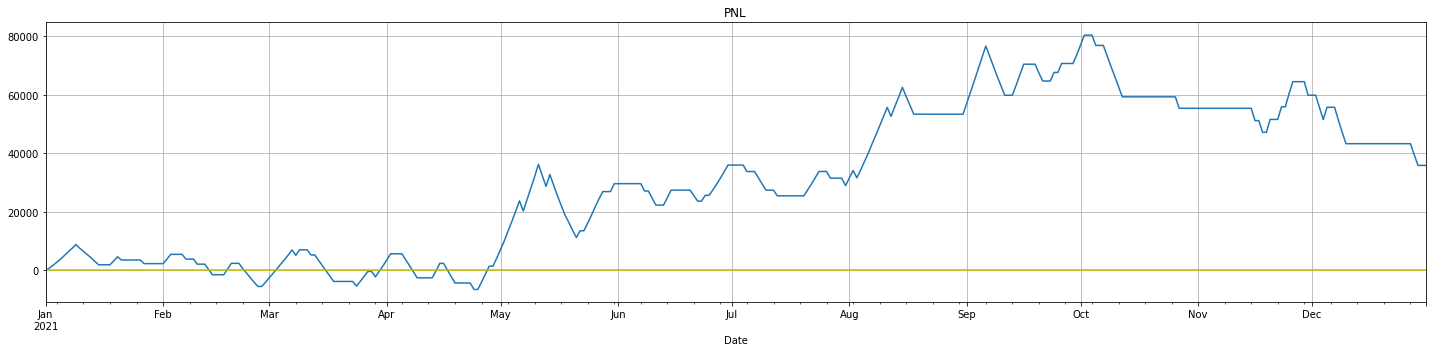

In [165]:
analyze('2021-01-01', '2021-12-31', df)

Profit:  4364.290000000008  Buy trades:  79  Sell trades:  74


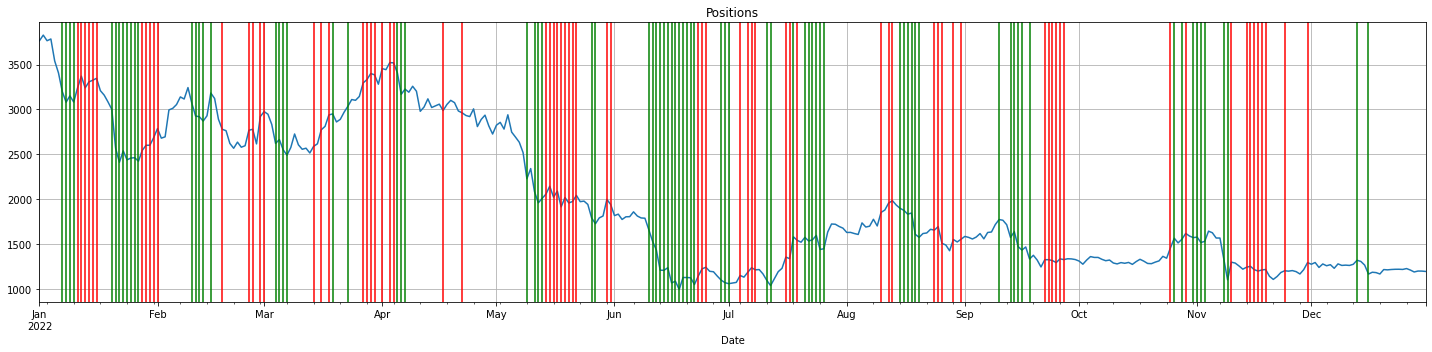

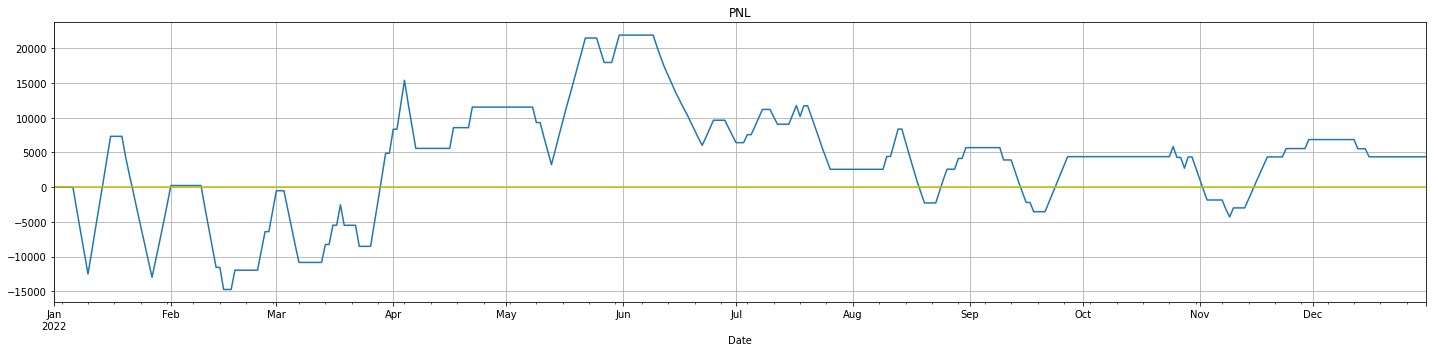

In [166]:
analyze('2022-01-01', '2022-12-31', df)